Notebook to replot the skill scores with more control

In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd

In [2]:
data_dir='/home/nso001/data/work7/OPP/salishsea-ensembles/ensk10/all_output/ensemble_group_plots/all/pickled_data/'

In [3]:
ens = ['K01', 'K02', 'K03', 'K04', 'K05', 'K06', 'K07', 'K08', 'K09', \
       'K10',] 
ens_mean='ENSK10'

In [4]:
en = ens[0]
score='sep'
fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
with open(fname, 'rb') as p:
    d = pickle.load(p)

In [5]:
fig, axs = plt.subplots(3,1, sharex=True, constrained_layout=True)
scores=['sep', 'liu', 'molcard']
diffs = {}
relative_diffs = {}
for score, ax in zip(scores, axs):
    en=ens_mean
    fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
    with open(fname, 'rb') as p:
        dens = pickle.load(p)
    diffs[score] = {}
    relative_diffs[score] = {}
    for en in ens:
        fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
        with open(fname, 'rb') as p:
           d = pickle.load(p)
        ax.plot(d['all_mean']['hours since start'], d['all_mean'][score], 'C0')
        diff = d['all_mean'][score].values - dens['all_mean'][score].values
        diffs[score][en] = diff
        relative_diffs[score][en] = diff/dens['all_mean'][score].values
    ax.plot(dens['all_mean']['hours since start'], dens['all_mean'][score], 'k', label='ensemble mean')
    ax.grid()
    label = score
    if score =='sep':
        label='sep [m]'
    ax.set_ylabel(label)
ax.set_xlabel('hours since start')
ax.legend()

/tmp/nso001/243284/ipykernel_869051/217008488.py:19: RuntimeWarning: invalid value encountered in divide
  relative_diffs[score][en] = diff/dens['all_mean'][score].values
/tmp/nso001/243284/ipykernel_869051/217008488.py:19: RuntimeWarning: invalid value encountered in divide
  relative_diffs[score][en] = diff/dens['all_mean'][score].values
/tmp/nso001/243284/ipykernel_869051/217008488.py:19: RuntimeWarning: invalid value encountered in divide
  relative_diffs[score][en] = diff/dens['all_mean'][score].values
/tmp/nso001/243284/ipykernel_869051/217008488.py:19: RuntimeWarning: invalid value encountered in divide
  relative_diffs[score][en] = diff/dens['all_mean'][score].values
/tmp/nso001/243284/ipykernel_869051/217008488.py:19: RuntimeWarning: invalid value encountered in divide
  relative_diffs[score][en] = diff/dens['all_mean'][score].values
/tmp/nso001/243284/ipykernel_869051/217008488.py:19: RuntimeWarning: invalid value encountered in divide
  relative_diffs[score][en] = diff/dens[

Idea - maybe plot hisograms of eahc hour. where is Ensemble better or worse with respect to skill?

In [6]:
fig, axs = plt.subplots(3,1,constrained_layout=True, sharex=True)
for score, ax in zip(scores, axs):
    # Translate diffs into an array
    arr = np.empty((len(ens),len(dens['all_mean']['hours since start'])))
    for i in range(len(ens)):
         en = ens[i]
         diff = diffs[score][en]
         for j in range(len(dens['all_mean']['hours since start'])):
             arr[i,j] = diff[j]
    if score != 'sep':
        arr = -1*arr
    arr = np.ma.masked_values(arr<0,0)
    mesh = ax.pcolormesh(np.arange(0,25), ens,arr)
    ax.set_title(score)
    ax.set_ylabel('Ens member')
    ax.grid()
ax=axs[-1]
ax.set_xlabel('hours since start')
fig.suptitle('Ensemble members performs better than ensemble mean (mean compared to mean)')

Text(0.5, 0.98, 'Ensemble members performs better than ensemble mean (mean compared to mean)')

Interesting they all give a slightly different picture. I wonder how the 0ing out if the liu/molcard score affects their means?

How much better?

sep mean, min, max rel. diff: (0.04067456920748692, -0.006662866010185444, 0.09252447467735282)
liu mean, min, max rel. diff: (0.048573208074509794, 0.0008525525179894594, 0.0973410794467221)
molcard mean, min, max rel. diff: (0.0628224801716767, -0.023639080403931974, 0.14708399540279316)


Text(0.5, 0.98, 'Ensemble member performs better/worse (red/blue) than ensemble mean')

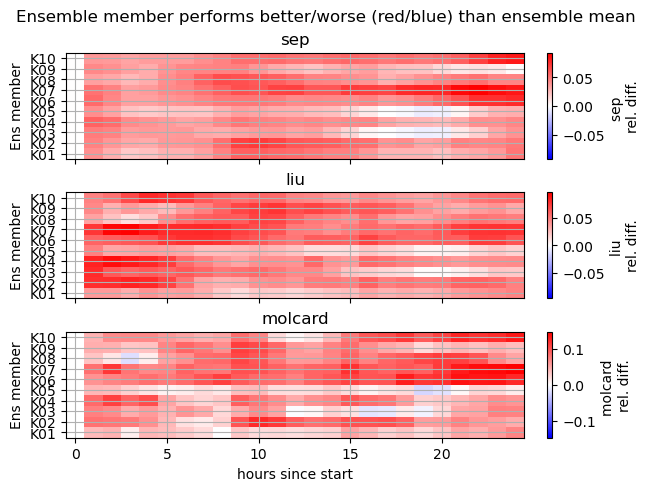

In [7]:
fig, axs = plt.subplots(3,1,constrained_layout=True, sharex=True)
for score, ax in zip(scores, axs):
    # Translate diffs into an array
    arr = np.empty((len(ens),len(dens['all_mean']['hours since start'])))
    for i in range(len(ens)):
         en = ens[i]
         diff = relative_diffs[score][en]
         for j in range(len(dens['all_mean']['hours since start'])):
             arr[i,j] = diff[j]
    if score != 'sep':
        arr = -1*arr
    print(f'{score} mean, min, max rel. diff: {np.mean(arr[:,1:]), np.min(arr[:,1:]), np.max(arr[:,1:])}')
    #arr = np.ma.masked_greater_equal(arr,0)
    mesh = ax.pcolormesh(np.arange(0,25), ens,arr,cmap='bwr',norm=colors.CenteredNorm())
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label(f'{score} \nrel. diff.')
    ax.set_title(score)
    ax.set_ylabel('Ens member')
    ax.grid()
ax=axs[-1]
ax.set_xlabel('hours since start')
fig.suptitle('Ensemble member performs better/worse (red/blue) than ensemble mean')

# boot straps

In [8]:
from plotutils.plotting_utils import bootstrap_skills

In [9]:
fig, axs = plt.subplots(3,1, sharex=True, constrained_layout=True)
scores=['sep', 'liu', 'molcard']
boots_upper = {}
boots_lower = {}
for score, ax in zip(scores, axs):
    en=ens_mean
    fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
    with open(fname, 'rb') as p:
        dens = pickle.load(p)
    boots_upper[score] = {}
    boots_lower[score] = {}
    for en in ens:
        fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
        with open(fname, 'rb') as p:
           d = pickle.load(p)
        boots = bootstrap_skills(d['all_drifters_all_tracks'], score).groupby('time_since_start')
        boots = boots.apply(
            lambda x: pd.Series(
                {
                    '2.5th percentile': x[score].quantile(.025),
                    '97.5th percentile': x[score].quantile(.975),
                    'mean': x[score].mean()
                }
            )
        )
        boots_upper[score][en] = boots['97.5th percentile']
        boots_lower[score][en] = boots['2.5th percentile']
    #ens means
    boots = bootstrap_skills(dens['all_drifters_all_tracks'], score).groupby('time_since_start')
    boots = boots.apply(
        lambda x: pd.Series(
            {
                '2.5th percentile': x[score].quantile(.025),
                '97.5th percentile': x[score].quantile(.975),
                'mean': x[score].mean()
            }
        )
    )
    boots_upper[score][ens_mean] = boots['97.5th percentile']
    boots_lower[score][ens_mean] = boots['2.5th percentile']

In [10]:
scores=['sep', 'liu', 'molcard']
diffs = {}
for score in scores:
    en=ens_mean
    fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
    with open(fname, 'rb') as p:
        dens = pickle.load(p)
    diffs[score] = {}
    for en in ens:
        fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
        with open(fname, 'rb') as p:
           d = pickle.load(p)
        ax.plot(d['all_mean']['hours since start'], d['all_mean'][score], 'C0')
        if score == 'sep':
            diff = boots_lower[score][en].values - dens['all_mean'][score].values
        else:
            diff = boots_upper[score][en].values - dens['all_mean'][score].values
        diffs[score][en] = diff

In [11]:
fig, axs = plt.subplots(3,1,constrained_layout=True, sharex=True)
for score, ax in zip(scores, axs):
    en=ens_mean
    fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
    with open(fname, 'rb') as p:
        dens = pickle.load(p)
    for en in ens:
        fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
        with open(fname, 'rb') as p:
           d = pickle.load(p)
        ax.plot(d['all_mean']['hours since start'], d['all_mean'][score], 'C0--')
        ax.plot(d['all_mean']['hours since start'], boots_upper[score][en], 'C1-')
        ax.plot(d['all_mean']['hours since start'], boots_lower[score][en], 'C2-')
    ax.plot(dens['all_mean']['hours since start'], dens['all_mean'][score], 'k', label='ensemble mean')
    ax.plot(dens['all_mean']['hours since start'], boots_upper[score][ens_mean], 'k--', label='ensemble mean 95% CI')
    ax.plot(dens['all_mean']['hours since start'], boots_lower[score][ens_mean], 'k--', label='__')
    ax.grid()
    label = score
    if score =='sep':
        label='sep [m]'
    ax.set_ylabel(label)
    ax.set_xlabel('hours since start')
fig

In [12]:
fig, axs = plt.subplots(3,1,constrained_layout=True, sharex=True)
for score, ax in zip(scores, axs):
    # Translate diffs into an array
    arr = np.empty((len(ens),len(dens['all_mean']['hours since start'])))
    for i in range(len(ens)):
         en = ens[i]
         diff = diffs[score][en]
         for j in range(len(dens['all_mean']['hours since start'])):
             arr[i,j] = diff[j]
    if score != 'sep':
        arr = -1*arr
    arr = np.ma.masked_values(arr>0,0)
    mesh = ax.pcolormesh(np.arange(0,25), ens,arr, )
    ax.set_title(score)
    ax.set_ylabel('Ens member')
    ax.grid()
ax=axs[-1]
ax.set_xlabel('hours since start')
fig.suptitle('Ensemble member boot95 performs worse than ensemble mean')
fig

# Figures for Michael


In [13]:
plt.style.use('seaborn-v0_8-talk')
from matplotlib.lines import Line2D

In [14]:
fig, ax = plt.subplots(1,1, sharex=True, constrained_layout=True)
score='sep'
scale= 1/1000 if score=='sep' else 1
en=ens_mean
fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
with open(fname, 'rb') as p:
    dens = pickle.load(p)
for en in ens:
    fname = os.path.join(data_dir, f'binned_skill_scores_all_{en}_{score}.pickle')
    with open(fname, 'rb') as p:
        d = pickle.load(p)
    ax.plot(d['all_mean']['hours since start'], d['all_mean'][score]*scale, 'C0')
ax.plot(dens['all_mean']['hours since start'], dens['all_mean'][score]*scale, 'k--', lw=3, label='Ensemble Mean')
ax.grid()
label = score
if score =='sep':
    label='Separation Distance [km]'
ax.set_ylabel(label)
ax.set_xlabel('hours since start')
ax.set_xlim([0,24])
handles, labels = ax.get_legend_handles_labels()
newline = Line2D([0], [0], label='Ensemble Members', color='C0')
handles.extend([newline])
ax.legend(handles=handles)

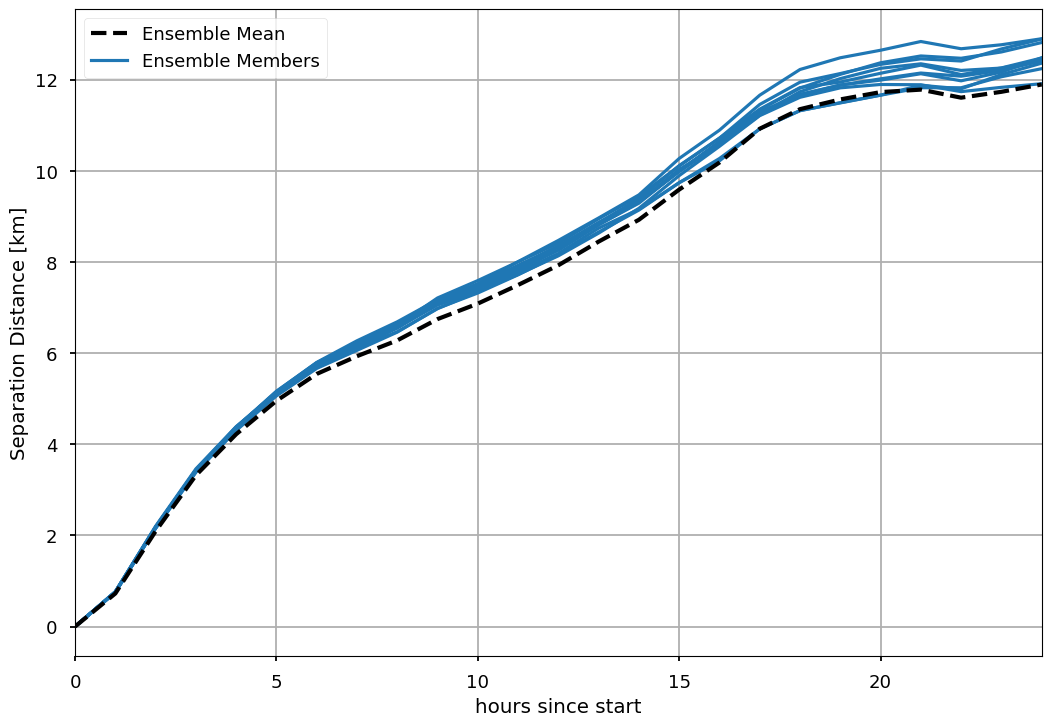

In [15]:
fig

In [16]:
fig.savefig('ENSK10-separation_distance.png', bbox_inches='tight')

In [20]:
fig, ax = plt.subplots(1,1,constrained_layout=True, sharex=True)
score='sep'
scale= 1/1000 if score=='sep' else 1
arr = np.empty((len(ens),len(dens['all_mean']['hours since start'])))
for i in range(len(ens)):
    en = ens[i]
    diff = relative_diffs[score][en]
    for j in range(len(dens['all_mean']['hours since start'])):
        arr[i,j] = diff[j]
        if score != 'sep':
            arr = -1*arr
print(f'{score} mean, min, max rel. diff: {np.mean(arr[:,1:]), np.min(arr[:,1:]), np.max(arr[:,1:])}')
#arr = np.ma.masked_greater_equal(arr,0)
if score=='sep':
    title='Separation Distance'
else:
    title=score
mesh = ax.pcolormesh(np.arange(0,25), ens,arr,cmap='RdBu_r',norm=colors.CenteredNorm())
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label(f'Relative  difference with ensemble mean')
ax.set_title(title)
ax.set_ylabel('Ens member')
ax.grid()
ax.set_xlabel('hour since start')

sep mean, min, max rel. diff: (0.04067456920748692, -0.006662866010185444, 0.09252447467735282)


Text(0.5, 0, 'hour since start')

In [21]:
fig

In [22]:
fig.savefig('ENSK10-separation_distance-relativeDiff.png', bbox_inches='tight')